This notebook is to prepare the data for the model

In [139]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'food.csv')

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [140]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [141]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Below I thought it would be more convenient to combined the two columns that list if they have children in the house, I do not think habits would change all that much based if say one household has kids and another has teens, to me the habits are probably somewhat similar

In [142]:
df['Bothhome'] = ((df['Kidhome'] == 1) | (df['Teenhome'] == 1)).astype("int64")

For basically the rest of the notebook below I put the rest of the demographic data into bins so the model can make better assumptions. The following columns include: Education, Marital Status, Year of Birth / Generation / Age, Income in the form of brackets. 

<Axes: >

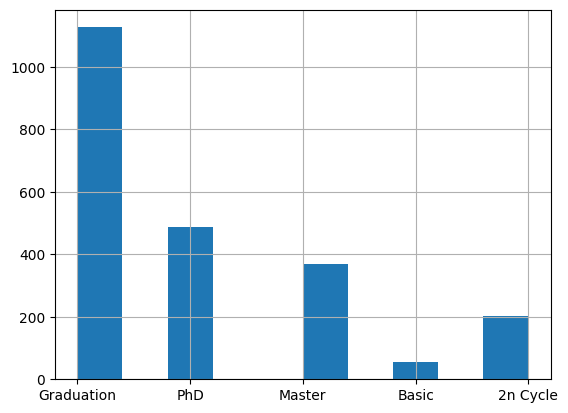

In [143]:
df['Education'].hist()


In [144]:
df['Education_Bin'] = ""

df.loc[(df['Education'] == 'Graduation') | (df['Education'] == 'Basic'), 'Education_Bin'] = '1'
df.loc[(df['Education'] == 'Master') | (df['Education'] == '2n Cycle'), 'Education_Bin'] = '2'
df.loc[(df['Education'] == 'PhD'), 'Education_Bin'] = '3'

df[['Education', 'Education_Bin', "ID"]]

,Education,Education_Bin,ID
0,Graduation,1,5524
1,Graduation,1,2174
2,Graduation,1,4141
3,Graduation,1,6182
4,PhD,3,5324
...,...,...,...
2235,Graduation,1,10870
2236,PhD,3,4001
2237,Graduation,1,7270
2238,Master,2,8235


<Axes: >

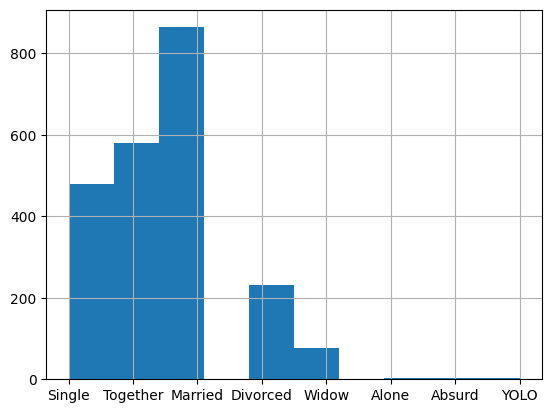

In [145]:
df['Marital_Status'].hist()

In [146]:
df['Marital_Status_Bin'] = ""
df.loc[(df['Marital_Status'] == 'Single') | (df['Marital_Status'] =='Alone') | (df['Marital_Status'] =='YOLO') | (df['Marital_Status'] =='Absurd'), 'Marital_Status_Bin'] = '1'
df.loc[(df['Marital_Status'] == 'Together'), 'Marital_Status_Bin'] = '2'
df.loc[(df['Marital_Status'] == 'Married'), 'Marital_Status_Bin'] = '3'
df.loc[(df['Marital_Status'] == "Divorced") | (df['Marital_Status'] == 'Widow'), 'Marital_Status_Bin'] = '4'

df[['Marital_Status', 'Marital_Status_Bin','ID']]

,Marital_Status,Marital_Status_Bin,ID
0,Single,1,5524
1,Single,1,2174
2,Together,2,4141
3,Together,2,6182
4,Married,3,5324
...,...,...,...
2235,Married,3,10870
2236,Together,2,4001
2237,Divorced,4,7270
2238,Together,2,8235


In [147]:
df.loc[df['Year_Birth'] == 1893, 'Year_Birth'] = 1993
df.loc[df['Year_Birth'] == 1899, 'Year_Birth'] = 1999
df.loc[df['Year_Birth'] == 1900, 'Year_Birth'] = 2000

In [148]:
df['Year_Birth'].min()

1940

In [149]:
df['Age_Bin'] = ""

df.loc[(df['Year_Birth'] >= 1940) & (df['Year_Birth'] <= 1952), 'Age_Bin'] = '1'
df.loc[(df['Year_Birth'] >= 1953) & (df['Year_Birth'] <= 1965), 'Age_Bin'] = '2'
df.loc[(df['Year_Birth'] >= 1966) & (df['Year_Birth'] <= 1980), 'Age_Bin'] = '3'
df.loc[(df['Year_Birth'] >= 1981) & (df['Year_Birth'] <= 1996), 'Age_Bin'] = '4'
df.loc[(df['Year_Birth'] >= 1997), 'Age_Bin'] = '5'

df[['Year_Birth', 'Age_Bin','ID']]

,Year_Birth,Age_Bin,ID
0,1957,2,5524
1,1954,2,2174
2,1965,2,4141
3,1984,4,6182
4,1981,4,5324
...,...,...,...
2235,1967,3,10870
2236,1946,1,4001
2237,1981,4,7270
2238,1956,2,8235


<Axes: >

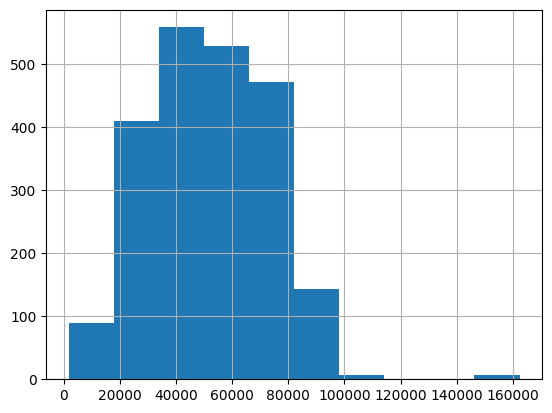

In [150]:
ignore_data = df['Income'] > 200000
histogram_data = df[~ignore_data] 
histogram_data['Income'].hist() 

In [151]:
df["Income"].isnull().sum()

24

In [152]:
df = df.dropna(subset=['Income'])

In [153]:
df['Income_Bin'] = None

df.loc[(df['Income'] <= 24999), 'Income_Bin'] = 1
df.loc[(df['Income'] >= 25000) & (df['Income'] <= 39999), 'Income_Bin'] = 2
df.loc[(df['Income'] >= 40000) & (df['Income'] <= 59999), 'Income_Bin'] = 3
df.loc[(df['Income'] >= 60000) & (df['Income'] <= 79999), 'Income_Bin'] = 4
df.loc[(df['Income'] >= 80000), 'Income_Bin'] = 5

df[['Income', 'Income_Bin','ID']]

C:\Users\nbwan\AppData\Local\Temp\ipykernel_6168\3542706486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_Bin'] = None


,Income,Income_Bin,ID
0,58138.0,3,5524
1,46344.0,3,2174
2,71613.0,4,4141
3,26646.0,2,6182
4,58293.0,3,5324
...,...,...,...
2235,61223.0,4,10870
2236,64014.0,4,4001
2237,56981.0,3,7270
2238,69245.0,4,8235


In [154]:
df['Income_Bin'].unique()

array([3, 4, 2, 1, 5], dtype=object)

In [155]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Bothhome,Education_Bin,Marital_Status_Bin,Age_Bin,Income_Bin
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,0,1,1,2,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,1,1,1,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,0,1,2,2,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,1,1,2,4,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,1,3,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,1,1,3,3,4
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,1,3,2,1,4
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,0,1,4,4,3
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,1,2,2,2,4


In [156]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Bothhome                 int64
Education_Bin           object
Marital_Status_Bin      object
Age_Bin 

In [157]:
df.to_csv('updatedfood.csv', index=False)